# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import tensorflow as tf

In [12]:
#Ouput different classes that the TFRecord stores
dataset = get_dataset("/data/waymo/*.tfrecord")
for batch in dataset.take(1):
    for m1, m2 in batch.items():
        print("{:2s}: ".format(m1, m2))

INFO:tensorflow:Reading unweighted datasets: ['/data/waymo/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/data/waymo/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 103
image: 
source_id: 
key: 
filename: 
groundtruth_image_confidences: 
groundtruth_verified_neg_classes: 
groundtruth_not_exhaustive_classes: 
groundtruth_boxes: 
groundtruth_area: 
groundtruth_is_crowd: 
groundtruth_difficult: 
groundtruth_group_of: 
groundtruth_weights: 
groundtruth_classes: 
groundtruth_image_classes: 
original_image_spatial_shape: 


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

(640, 640, 3)
bboxes:  [[1.1121905  0.         1.2167976  0.05230355]
 [1.1570926  1.4314395  1.694931   2.8633726 ]
 [0.96514845 0.45494217 1.3737082  1.0292944 ]
 [0.97156304 0.16085808 1.302161   0.50625885]
 [1.1116971  0.01973719 1.2330807  0.1796084 ]]
bboxes:  [[421.8085    0.      461.48178  11.15809]
 [438.83807 305.37378 642.8183  610.8528 ]
 [366.0415   97.05433 520.9916  219.58281]
 [368.47427  34.31639 493.85663 108.00189]
 [421.62143   4.2106  467.6573   38.31646]]


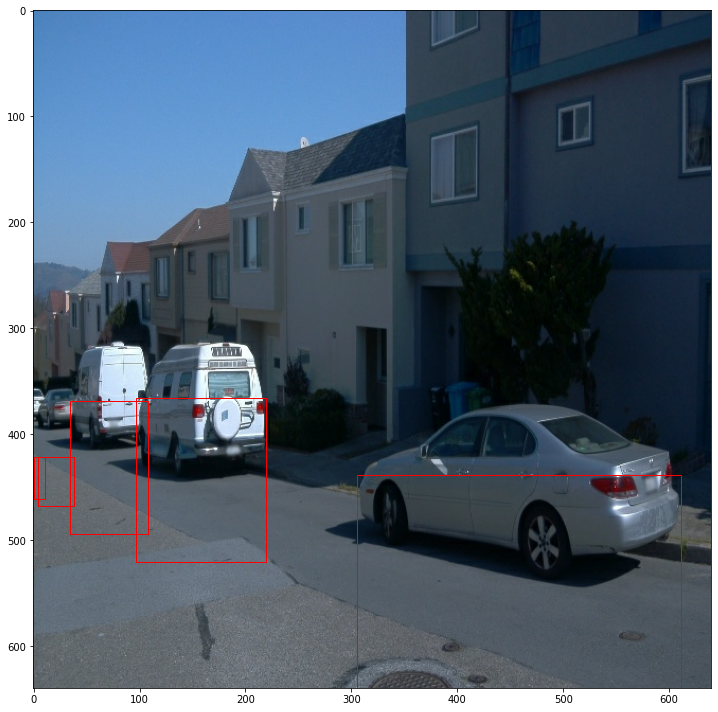

In [60]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
from PIL import Image
import IPython.display

def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    example = batch.take(20)
    
    #color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]}
    
    i = 0
    for sample in example:
        x = i % 4
        y = i % 5
        
        image = sample["image"].numpy()
        
        f, ax = plt.subplots(1, figsize = (10, 10))
        ax.imshow(image.astype(np.uint8))
        
        bboxes = sample["groundtruth_boxes"].numpy()
        classes = sample["groundtruth_classes"].numpy()
        
        print("bboxes: ", bboxes)
        w, h, _ = image.shape
        bboxes[:, [1, 3]] = ((bboxes[:, [1, 3]]*w)/1920)*w
        bboxes[:, [0, 2]] = ((bboxes[:, [0, 2]]*h)/1080)*h
        print("bboxes: ", bboxes)
       
        for cl, bb in zip(classes, bboxes):
            y1, x1, y2, x2 = bb
            rec = Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor = "None",
                           edgecolor = colormap[cl])
            ax.add_patch(rec)
        ax.axis('on')
        break
        i += 1
    plt.tight_layout()
    plt.show()

display_instances(dataset)

In [ ]:
for idx, data in enumerate(dataset):
    frame = open_dataset.Frame()
    frame.ParseFromStrinh(bytearray(data.numpy()))
    encoded_jpeg, annotations = parse_frame(frame)
    print(annotations)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [ ]:
## STUDENT SOLUTION HERE

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...